In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 8, 27)

df = yf.download(stock, start, end)

C:\Users\haseeeb\AppData\Local\Temp\ipykernel_13888\1672214401.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.246147,35.098938,26.652754,28.784334,855215656
2007-10-08,30.595387,33.335989,30.403063,33.335989,126671715
2007-10-09,32.678886,32.967370,28.960641,30.611413,116725709
2007-10-10,32.983395,33.656526,32.694911,33.528309,67931378
2007-10-11,36.669586,38.464601,32.694912,38.464601,106320954


In [4]:
df.shape

(4411, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4411 entries, 2007-10-05 to 2025-08-26
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4411 non-null   float64
 1   (High, POWERGRID.NS)    4411 non-null   float64
 2   (Low, POWERGRID.NS)     4411 non-null   float64
 3   (Open, POWERGRID.NS)    4411 non-null   float64
 4   (Volume, POWERGRID.NS)  4411 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 206.8 KB


In [6]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4411.000000,4411.000000,4411.000000,4411.000000,4.411000e+03
mean,88.816624,89.954347,87.697262,88.858464,1.192358e+07
std,76.651297,77.535309,75.744765,76.651050,2.018445e+07
min,18.827003,20.125417,16.879383,20.028036,0.000000e+00
25%,36.535074,37.083530,36.027410,36.581960,4.923636e+06
50%,66.065887,67.063357,65.260746,66.065061,8.525850e+06
75%,97.503757,99.454974,96.516811,97.696617,1.377467e+07
max,354.580750,355.356950,346.576122,353.222365,8.552157e+08


In [8]:
df = df.reset_index()

In [9]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv("powergrid.csv")

In [11]:
data01 = pd.read_csv("powergrid.csv")

In [12]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.24614715576172,35.09893816090402,26.65275437401549,28.78433449972458,855215656
2,1,2007-10-08,30.595386505126953,33.33598918181694,30.403062671265122,33.33598918181694,126671715
3,2,2007-10-09,32.67888641357422,32.96737000053574,28.960641438351498,30.61141273645566,116725709
4,3,2007-10-10,32.983394622802734,33.65652583511763,32.69491105969017,33.52830922745379,67931378


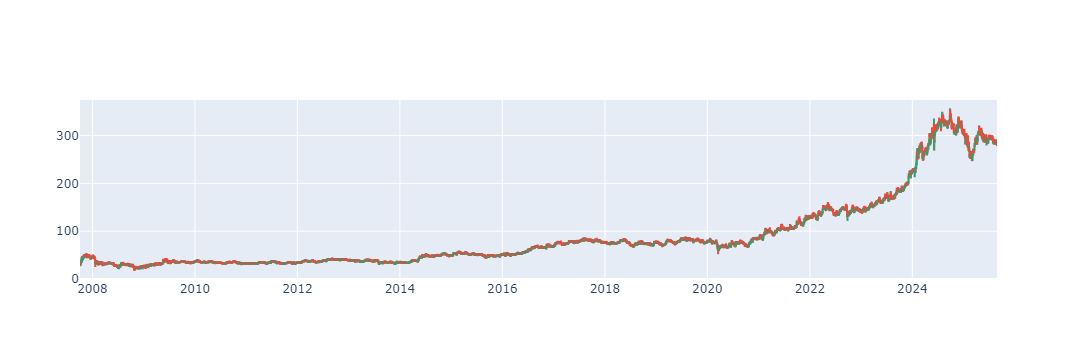

In [13]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [14]:
df = df.drop(['Date'], axis = 1)

C:\Users\haseeeb\AppData\Local\Temp\ipykernel_13888\1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [15]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.246147,35.098938,26.652754,28.784334,855215656
1,30.595387,33.335989,30.403063,33.335989,126671715
2,32.678886,32.967370,28.960641,30.611413,116725709
3,32.983395,33.656526,32.694911,33.528309,67931378
4,36.669586,38.464601,32.694912,38.464601,106320954


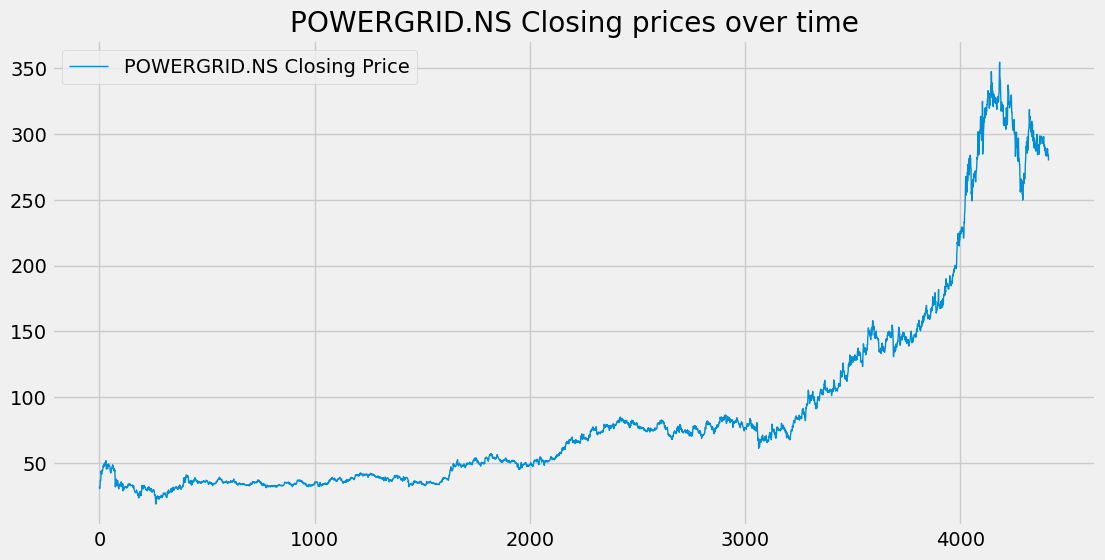

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

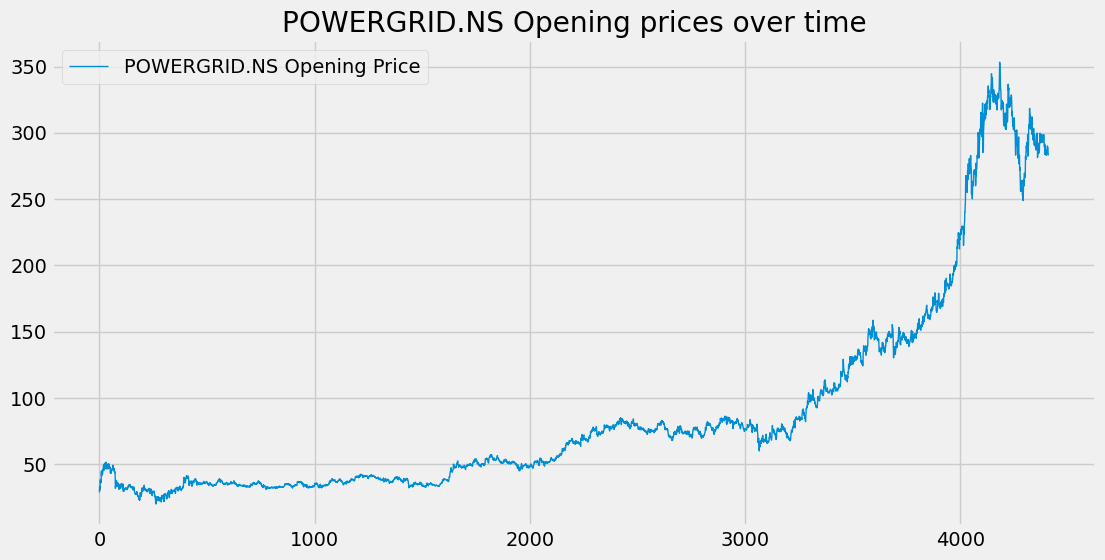

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

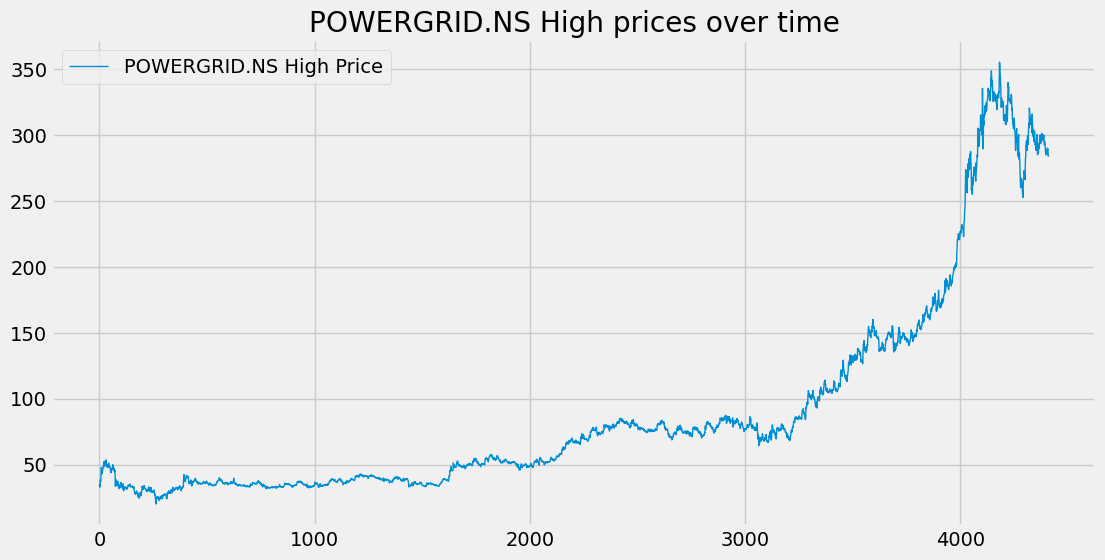

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

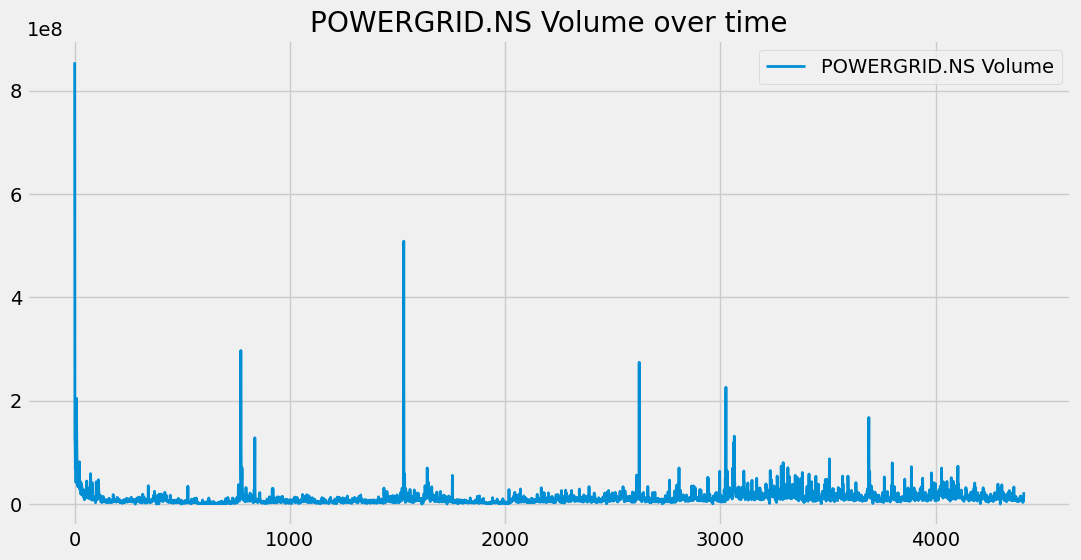

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [20]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [21]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [22]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [23]:
ma100 = df.Close.rolling(100).mean()

In [24]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4406,294.704695
4407,294.648716
4408,294.539938
4409,294.490438


In [25]:
ma200 = df.Close.rolling(200).mean()

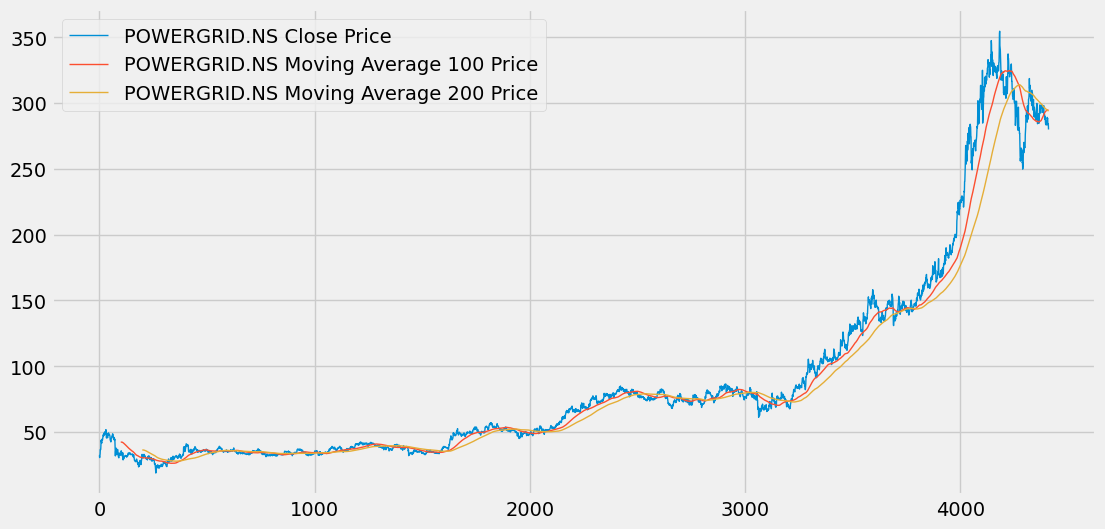

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [27]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [28]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

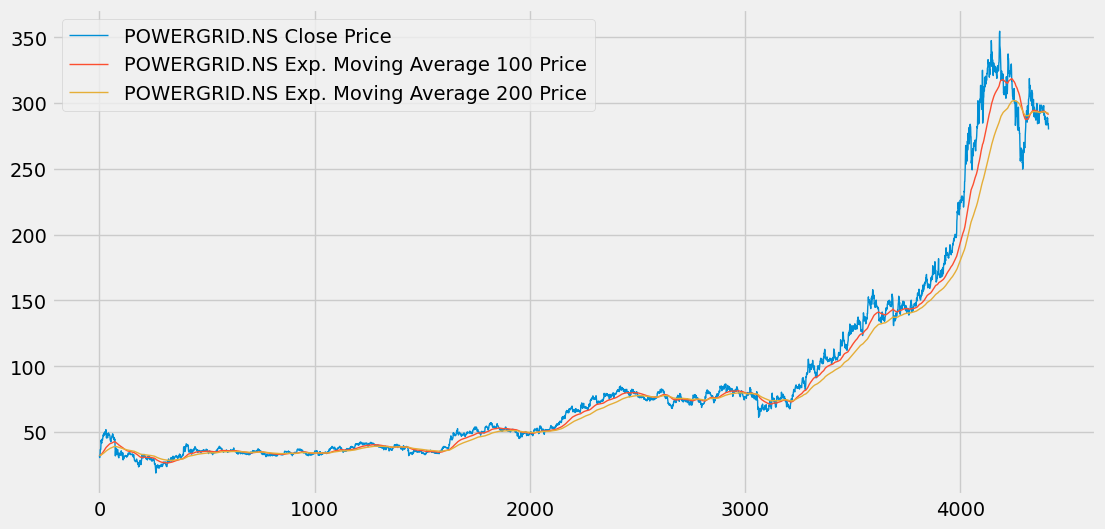

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [30]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [31]:
data_training.shape

(3087, 1)

In [32]:
data_testing.shape

(1324, 1)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [34]:
data_training_array = scaler.fit_transform(data_training)

In [35]:
data_training_array

array([[0.19808599],
       [0.17371837],
       [0.20447384],
       ...,
       [0.73835337],
       [0.71203836],
       [0.71924374]])

In [36]:
data_training_array.shape[0]

3087

In [37]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [38]:
x_train.shape

(2987, 100, 1)

In [39]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [40]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\haseeeb\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,x_train,epochs=50)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 37s 306ms/step - loss: 0.0858
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 305ms/step - loss: 0.0099
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - loss: 0.0088
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 206ms/step - loss: 0.0084
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - loss: 0.0077
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 223ms/step - loss: 0.0063
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 289ms/step - loss: 0.0074
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 230ms/step - loss: 2.2346
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - loss: 0.0101
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 197ms/step - loss: 0.0086
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - loss: 0.0062
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 199ms/step - loss: 0.0062
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step - loss: 0.0064
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 195ms/step - loss: 0.0066
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [45]:
past_100_days = data_training.tail(100)

In [47]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [48]:
final_df.head()

Ticker,POWERGRID.NS
0,80.300789
1,79.134056
2,78.356232
3,77.537453
4,77.128067


In [49]:
input_data = scaler.fit_transform(final_df)

In [50]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [51]:
x_test.shape

(1324, 100, 1)

In [52]:
y_predicted = model.predict(x_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step


In [53]:
y_predicted.shape

(1324, 1)

In [54]:
scaler.scale_

array([0.00340836])

In [55]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

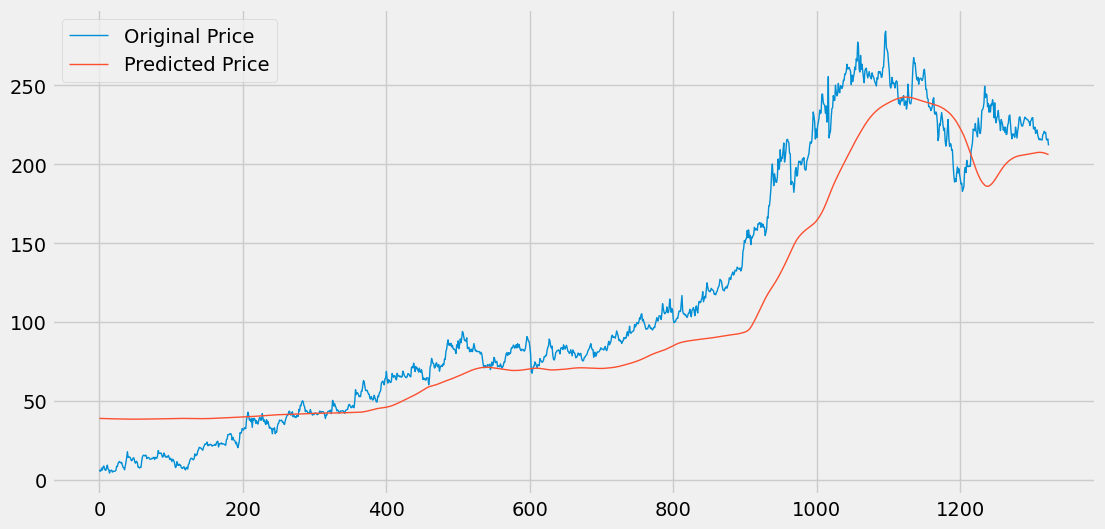

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [88]:
model.save('stock_dl_model.h5')